# 手書き文字分類サンプル（SVM）

In [2]:
from sklearn import datasets

In [3]:
digits = datasets.load_digits()

In [5]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [17]:
digits.data.shape

(1797, 64)

In [19]:
import matplotlib.pyplot as plt

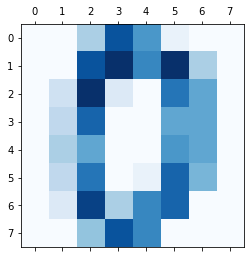

In [24]:
plt.matshow(digits.images[0], cmap='Blues')
# https://matplotlib.org/examples/color/colormaps_reference.html

In [25]:
# 訓練データとテストデータ作成
n_train = len(digits.data)*2//3
X_train = digits.data[:n_train]
y_train = digits.target[:n_train]
X_test = digits.data[n_train:]
y_test = digits.target[n_train:]

In [29]:
print([d.shape for d in [X_train, y_train, X_test, y_test]])

[(1198, 64), (1198,), (599, 64), (599,)]


In [30]:
from sklearn import svm

In [52]:
# 学習
clf = svm.SVC(gamma=0.001)
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [53]:
# 正答率
clf.score(X_test, y_test)

0.9632721202003339

In [35]:
# 誤答数
predicted = clf.predict(X_test)
(y_test != predicted).sum()

22

In [43]:
(y_test == predicted).sum()

577

In [36]:
from sklearn import metrics

In [41]:
print(metrics.classification_report(y_test, predicted))

precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.97      1.00      0.98        62
           2       1.00      0.98      0.99        60
           3       0.96      0.81      0.88        62
           4       0.98      0.95      0.97        62
           5       0.95      0.98      0.97        59
           6       0.98      0.98      0.98        61
           7       0.95      1.00      0.98        61
           8       0.89      0.98      0.93        55
           9       0.95      0.97      0.96        58

    accuracy                           0.96       599
   macro avg       0.96      0.96      0.96       599
weighted avg       0.96      0.96      0.96       599



In [42]:
metrics.confusion_matrix(y_test, predicted)

array([[58,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 62,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 59,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 50,  0,  2,  0,  3,  7,  0],
       [ 0,  0,  0,  0, 59,  0,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  0, 58,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 60,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 61,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 54,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  0, 56]])